In [112]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import math
import cmath
import scipy
import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.special as special
import numpy.ma as ma
#np.set_printoptions(threshold=sys.maxsize)
pts = 5000 # number of iterator steps where neccessary
H_to_K = 1/0.000003166808534191 # conversion of Henries to Kelvin
tol = 1e-6 # tolerance where neccessary

In [133]:
r1 = 4.5 # starting posistion r1 in ao
r2 = 100 # ending posistion r2 in ao
dr1 = 0.01 # step spacing in ao
dr2 = 0.02
r3 = 100

dr3 = 0.01
r4 = 100


N1 = int((r2-r1)/dr1) # Number of grid points
Np = int((r3-r1)/dr2) # Number of grid points
Npp = int((r4-r1)/dr3)

ipap = np.arange(1,N1, 1.0) # indexing from the paper, given i = 1,2,...,N-1
ipap_p = np.arange(1,Np, 1.0) # indexing from the paper, given i = 1,2,...,N-1
ipap_pp = np.arange(1,Npp, 1.0)

r = r1 + dr1*ipap
rp = r1 + dr2*ipap_p
rpp = r1 + dr3*ipap_pp
print(len(rpp))


C12 = 3.05e8 # C12 coefficient in Eh*ao
C6 = 4710 # C6 coefficient in Eh*ao
C6p = 4e6 # C6' coefficient in Eh*ao
C3 = 20 # C3 coefficient in Eh*ao

VLJ = (C12/(r**12)) - (C6/(r**6)) # standard Lennard-Jones interatomic potential
VE = (C6p*(1/(r**6))) - (C3*(1/(r**3)))

Eo = 3.166808534191e-12 # inital particle energy, 1uK in Hartrees
me = 9.1093837e-28 # electron mass in grams
mrb_g = 1.4192261e-22 # rubidium mass in grams
mrb = mrb_g/me # rubidium mass in au
mu = (mrb**2)/(2*mrb) # reduced mass of rubidium
hbar = 1.0546e-27 # reduced Planck constant in cgs
e = 4.8032e-10 # electron charge in cgs
ao = (hbar**2)/(me*e**2) # Bohr radius in cgs

9549


# Ground State --- Lennard-Jones
## $V(r) = \frac{C_{12}}{r^{12}} - \frac{C_{6}}{r^{6}}$
## $C_{12} = 3.05\times10^{8} E_{h}a_{0}$, $C_{6} = 4710 E_{h}a_{0}$

#  $ 1^{st} $ Excited State --- C3 thing 
## $V_E(r) = \frac{C_{6}'}{r^{6}} - \frac{C_{3}}{r^{3}}$
## $C_{6}' = 4\times10^{6} E_{h}a_{0}$, $C_{3} = 20 E_{h}a_{0}$

 N1 = 9550


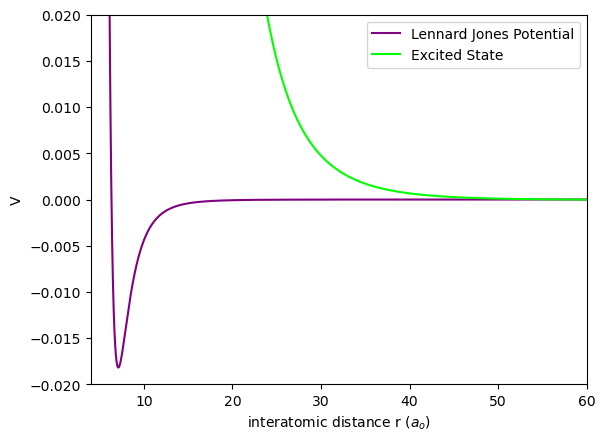

In [137]:
plt.plot(r, VLJ, color = 'purple', label = 'Lennard Jones Potential')
plt.plot(r, VE, color = 'lime', label = 'Excited State')
plt.ylabel('V')
plt.xlabel('interatomic distance r $(a_o)$')
plt.legend()
plt.ylim(-0.02,0.02)
plt.xlim(4,60)

print(f' N1 = {N1}')

 N1 = 9550


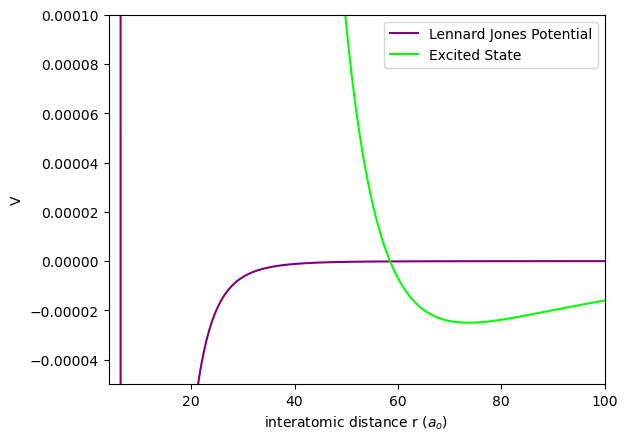

In [138]:
plt.plot(r, VLJ, color = 'purple', label = 'Lennard Jones Potential')
plt.plot(r, VE, color = 'lime', label = 'Excited State')
plt.ylabel('V')
plt.xlabel('interatomic distance r $(a_o)$')
plt.legend()
plt.ylim(-5e-5,10e-5)
plt.xlim(4,r2)

print(f' N1 = {N1}')

# Scattering States of the Lennard Jones Potential

In [141]:
def Numerov(Energy, Num, V_r, dr, grid): # function to find psi(r) continuum state (E>0)
    psi[0] = 0 # impose boundary condition psi(0) = 0
    psi[1] = dr # let psi(1) = the spacing length
    #print(f' psi[1] = {psi[1]}')
    ksq = 2*mu*(Energy - V_r) # wave number squared for the energy
    ksq_p = 2*mu*Energy

    for i in range(2,Num-1):  # Numerov Algorithm, range is 2 -> N since psi(0), psi(1) already set
        #if i < 100:
           # print(f' first term in numerator is {(2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1])}')
           # print(f' the numerator is {((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))}')
        psi[i] = ((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))/(1 + (1/12)*(dr**2)*ksq[i])
    Psi_f = psi/max(psi) # divide Psi by its largest value to qvoid it becoming too large
    Psi_prime = np.gradient(Psi_f, grid) # find the derivate over the grid r
    
    # Energy Normalization
    A_term = Psi_f[-1]**2
    B_term = Psi_prime[-1]**2
    B_coef = 1/(ksq[-1])
    U_sq = A_term + B_coef*B_term
    U = np.sqrt(U_sq)
    norm_factor = np.sqrt((2*mu)*(1/(np.pi*np.sqrt(ksq[-1]))))
    print((U,norm_factor))
    
    Psi_Energy_Normalized = (1/U)*(Psi_f)*norm_factor
    
        
    return Psi_Energy_Normalized

(3554.702223446305, 1352.6094360548711)


(4.0, 99.99)

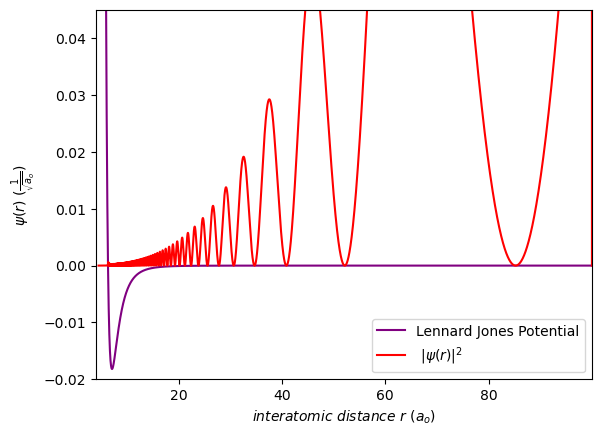

In [142]:
VLJ = (C12/(rpp**12)) - (C6/(rpp**6))
psi = np.zeros(Npp-1)  # initializing psi(r) as array of zeros
Psi_1 = Numerov(Eo, Npp-1, VLJ, dr3, rpp) # wave function Psi
#plt.plot(r, Psi_1, label = f' $\\psi(r)$', color = 'red') 
plt.plot(rpp, VLJ, color = 'purple', label = 'Lennard Jones Potential')

psi_1prime = np.gradient(Psi_1, rpp) # first posistion derivate of wave function Psi
plt.plot(rpp, np.abs(Psi_1)**2, label = f' $|\\psi(r)|^2$', color = 'red') 
#plt.plot(r, Vr*1e0, label = 'Scaled Lennard-Jones Potential', color = 'purple')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.legend()

plt.ylim(-0.02,0.045)
#plt.ylim(-0.001,0.001)
plt.xlim(4,max(rpp))

(3554.702223446305, 1352.6094360548711)


(-0.001, 0.001)

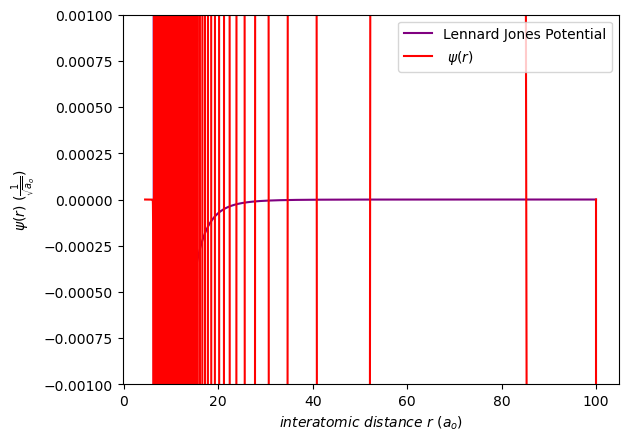

In [161]:
VLJ = (C12/(rpp**12)) - (C6/(rpp**6))
psi = np.zeros(Npp-1)  # initializing psi(r) as array of zeros
Psi_1 = Numerov(Eo, Npp-1, VLJ, dr3, rpp) # wave function Psi
#plt.plot(r, Psi_1, label = f' $\\psi(r)$', color = 'red') 
plt.plot(rpp, VLJ, color = 'purple', label = 'Lennard Jones Potential')
INT = np.trapz(np.abs(Psi_1)**2,rpp)
A = 1/np.sqrt(INT)
Psi_1 = Psi_1*A

psi_1prime = np.gradient(Psi_1, rpp) # first posistion derivate of wave function Psi
plt.plot(rpp, Psi_1, label = f' $\\psi(r)$', color = 'red') 
#plt.plot(r, Vr*1e0, label = 'Scaled Lennard-Jones Potential', color = 'purple')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.legend()

plt.ylim(-0.001,0.001)
#plt.xlim(6,11)

# Bound States of Excited Potential

In [145]:
def Hamiltonian_DVR(a, b, dx): # DVR method for finding bound states
    N = int((b-a)/dx) # Number of grid points
    ipaper = np.arange(1,N, 1.0) # indexing from the paper, given i = 1,2,...,N-1
    x = a + dx*ipaper # grid from paper
    Vx = C6p/(x**6) - C3/(x**3) # Lennard-Jones potential
    Vx = np.insert(Vx,0,0) # Insert a 0 at the 0th index of list to account for mismatched indexing

    #print(f' ipaper = {ipaper}')
    #print(f' x = {x}')
    print(f' N - 1 = {N-1}')
    #print(f' len(x) = {len(x)}')
    #print(x[-1]/(b-dx))
    #print(x[0]/(a+dx))
    #print(f' dx = {dx}')
    #print(f'dx from grid  = {x[1] - x[0]}')
    #print(Vx[len(Vx) - 1]/(0.5*(b - dx - d)**2))

    H_DVR = np.zeros((len(x), len(x))) # Initialize empty Hamiltonian matrix of size N-1 x N-1
    Vmat = np.zeros((len(x) + 10, len(x) + 10))
    Tmat = np.zeros((len(x) + 10, len(x) + 10))


    for i in ipaper:
        for j in ipaper:
            if int(i) == int(j): # fill in diagonal components of the Hamiltonian
                prefactorii = (np.pi**2)/(4*mu*(b-a)**2)
                bracketii = ((2*N**2 + 1)/3) - (1/((np.sin(np.pi*(i/N)))**2))
                
                Tmat[int(i)][int(j)] = prefactorii*bracketii
                Vmat[int(i)][int(j)] = Vx[int(j)]
                
                H_DVR[int(i) - 1][int(j) - 1] = Tmat[int(i)][int(j)] + Vmat[int(i)][int(j)]
            
            if i != j: # fill in off-diagonal components of the Hamiltonian
                diff = i - j
                prefactorij = ((-1)**(diff))*(np.pi**2)/(4*mu*(b-a)**2)
                bracketij = (1/((np.sin(np.pi*((diff)/(2*N))))**2)) - (1/((np.sin(np.pi*((i+j)/(2*N))))**2))
                Tmat[int(i)][int(j)] = prefactorij*bracketij               
                
                H_DVR[int(i) - 1][int(j) - 1] = Tmat[int(i)][int(j)]
                
    #assert(np.allclose(H_DVR, np.transpose(H_DVR)))
    #print(f' H = {H}')
    return H_DVR

In [148]:
a1 = 16
b1 = 95.5 + a1
dx1 = 0.01

N1 = int((b1-a1)/dx1) # Number of grid points
ipap = np.arange(1,N1, 1.0) # indexing from the paper, given i = 1,2,...,N-1
x1 = a1 + dx1*ipap

V1excited = C6p/(x1**6) - C3/(x1**3)
#V1excited_pos = C6p/(x1**6) - C3/(x1**3) + 5
#Vmin = min(VLJ)

dr2 = 0.02
H = Hamiltonian_DVR(r1, r4, dr3)

 N - 1 = 9549


In [149]:
Heig = np.linalg.eigh(H)[0]
print(f'there are {len(Heig[Heig < 0])} bound states')

Eigvec = np.linalg.eigh(H)[1]
Hvec = []
for i in range(len(H[0])):
    avec = Eigvec[:,i]
    Hvec.append(avec)

there are 23 bound states


In [151]:
for i in range(len(Hvec)):
    INT = np.trapz(np.abs(Hvec[i])**2,rpp)
    A = 1/np.sqrt(INT)
    Hvec[i] = A*Hvec[i]

In [152]:
print(len(rp))

4774


[-2.44877679e-05 -2.34889553e-05 -2.25221735e-05 -2.15867147e-05
 -2.06818774e-05 -1.98069623e-05 -1.89611861e-05 -1.81427138e-05
 -1.73431222e-05 -1.65360061e-05 -1.56824936e-05 -1.47587274e-05
 -1.37612912e-05 -1.26945540e-05 -1.15635486e-05 -1.03724372e-05
 -9.12452150e-06 -7.82245833e-06 -6.46843688e-06 -5.06430174e-06
 -3.61163672e-06 -2.11182301e-06 -5.66080532e-07  1.02450174e-06
  2.65894310e-06  4.33635369e-06  6.05592085e-06  7.81689832e-06
  9.61859741e-06  1.14603798e-05]


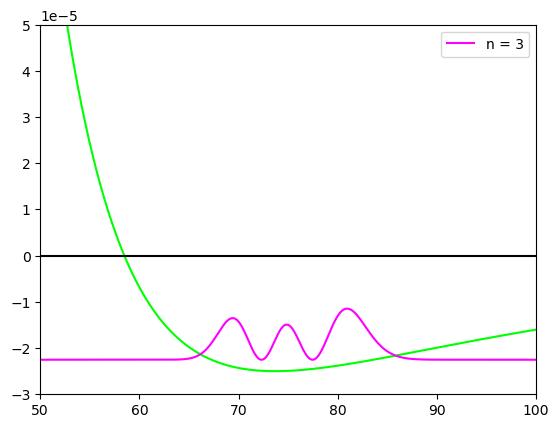

In [155]:
V1excited = C6p/(rpp**6) - C3/(rpp**3)
plt.plot(rpp, V1excited, color = 'lime')
plt.hlines(0, r1, r4, color = 'black')

for i in range(len(Heig[Heig < 0])):
 #   if i % 5 == 0:
  #      plt.plot(rp, 0.0005*np.abs(Hvec[i])**2 + Heig[i])
    if i == 2:
        plt.plot(rpp, 0.0001*np.abs(Hvec[i])**2 + Heig[i], color = 'fuchsia', label = f'n = {i+1}')
plt.legend()
plt.ylim(-3e-5,5e-5)
plt.xlim(50,r4)
#plt.xlim(50,70)
print(Heig[0:30])

In [156]:
for i in range(len(Heig[Heig < 0])): # run through all eigenvectors corresponding to bound states
    for j in range(len(Heig[Heig < 0])): # run through all other eigenvectors corresponding to bound states
        
        if i == j: # inner product should be close to 1
            phi_n = np.conjugate(Hvec[i])
            phi_m = Hvec[j]
            produit = phi_n*phi_m
            InnerProduct = np.trapz(produit, x1)
            assert(InnerProduct - 1 <= tol)

        if i != j: # inner product should be close to 0
            phi_n = np.conjugate(Hvec[i])
            phi_m = Hvec[j]
            produit = phi_n*phi_m
            InnerProduct = np.trapz(produit, x1)
            assert(InnerProduct <= tol)

# Inner product between bound excited state wave functions and continuum ground state scattering wave functions

# Franck-Condon Factor
## $ \braket{\varphi_{b}|\psi_{s}}  = \int_{r1}^{r2} \varphi^*_{b}\psi_{s}\,dr$

In [159]:
PHI_B = np.conjugate(Hvec[0])
Integrand = PHI_B*Psi_1
Inner_Product = np.trapz(Integrand, rpp)
print(Inner_Product)

-0.4892731856212919


## NEXT: 
### 1.) Vary bound states with in FC factor and see if there is a trend (choose different bound state for the same scattering state)
### 2.) Vary scattering length (C12 coefficient) to see the effect on a paticular bound state (Vary the C12 coefficient in the LJ potential and compare FC factor for the same excited bound state)